In [1]:
!pip install kagglehub
!pip install pandas scikit-learn matplotlib seaborn

In [2]:
# download dataset from kaggle

import kagglehub

path = kagglehub.dataset_download("mohamedafsal007/house-price-dataset-of-india")
print("Path to dataset files:", path)

100%|██████████| 480k/480k [00:00<00:00, 44.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mohamedafsal007/house-price-dataset-of-india/versions/1


In [20]:
import pandas as pd
import os

print("Files downloaded:", os.listdir(path))

# Load dataset
data_file = os.path.join(path, 'House Price India.csv')
df = pd.read_csv(data_file)
df.head()

Files downloaded: ['House Price India.csv']


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [21]:
# basic info
df.info()

# summary stats
df.describe()

# Missing values
print("Missing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14620 entries, 0 to 14619
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14620 non-null  int64  
 1   Date                                   14620 non-null  int64  
 2   number of bedrooms                     14620 non-null  int64  
 3   number of bathrooms                    14620 non-null  float64
 4   living area                            14620 non-null  int64  
 5   lot area                               14620 non-null  int64  
 6   number of floors                       14620 non-null  float64
 7   waterfront present                     14620 non-null  int64  
 8   number of views                        14620 non-null  int64  
 9   condition of the house                 14620 non-null  int64  
 10  grade of the house                     14620 non-null  int64  
 11  Ar

In [29]:
# Drop 'id'
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Convert 'Date' into datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df.drop('Date', axis=1, inplace=True)

df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),...,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,year,month
0,5,2.50,3650,9050,2.0,0,4,5,10,3370,...,122003,52.8645,-114.557,2880,5400,2,58,2380000,1970,1
1,4,2.50,2920,4000,1.5,0,0,5,8,1910,...,122004,52.8878,-114.470,2470,4000,2,51,1400000,1970,1
2,5,2.75,2910,9480,1.5,0,0,3,8,2910,...,122004,52.8852,-114.468,2940,6600,1,53,1200000,1970,1
3,4,2.50,3310,42998,2.0,0,0,3,9,3310,...,122005,52.9532,-114.321,3350,42847,3,76,838000,1970,1
4,3,2.00,2710,4500,1.5,0,0,4,8,1880,...,122006,52.9047,-114.485,2060,4500,1,51,805000,1970,1


In [24]:
target_column = 'Price'

# Separate features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

# One-hot encoding
X = pd.get_dummies(X, columns=['condition of the house'], drop_first=True)

X.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,grade of the house,Area of the house(excluding basement),Area of the basement,...,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,year,month,condition of the house_2,condition of the house_3,condition of the house_4,condition of the house_5
0,5,2.50,3650,9050,2.0,0,4,10,3370,280,...,2880,5400,2,58,1970,1,False,False,False,True
1,4,2.50,2920,4000,1.5,0,0,8,1910,1010,...,2470,4000,2,51,1970,1,False,False,False,True
2,5,2.75,2910,9480,1.5,0,0,8,2910,0,...,2940,6600,1,53,1970,1,False,True,False,False
3,4,2.50,3310,42998,2.0,0,0,9,3310,0,...,3350,42847,3,76,1970,1,False,True,False,False
4,3,2.00,2710,4500,1.5,0,0,8,1880,830,...,2060,4500,1,51,1970,1,False,False,True,False


In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (11696, 21)
Testing set size: (2924, 21)


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on test
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 39631135219.661736
R2 Score: 0.7187664602478476


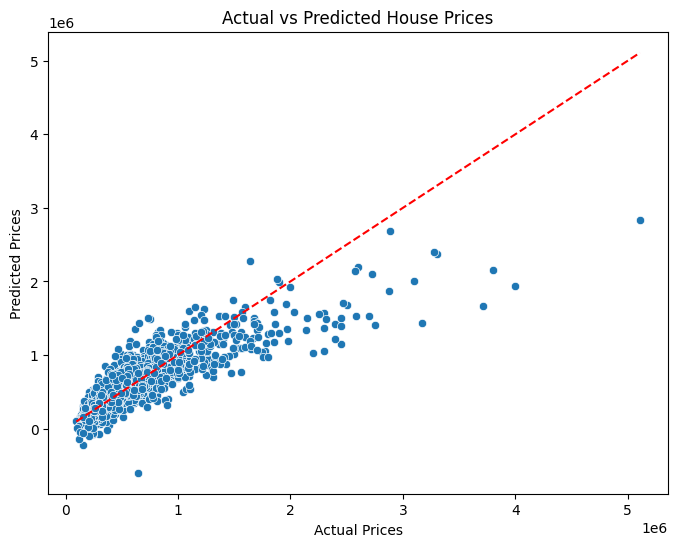

In [19]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()